# 1. Import Libraries used

In [363]:
import seaborn as sns
from pymongo import MongoClient 
import xlsxwriter 
import pandas as pd 
from pandas import read_excel 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot 
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import pylab as pl 
from scipy.stats import norm 
import pygal 
import pygal_maps_world 
from pygal import Config 
from pygal.maps.world import World 
from pygal.maps.world import COUNTRIES 
from pygal.style import RotateStyle
import warnings
from pygal.style import Style

# 2. Load Dataset and Basic Explorations

This dataset contains several transactions spanning from 2010 to 2011, across  multiple countries and several invoices and products ("Online Retail.xlsx").


In [60]:
# Load  dataset
df = pd.read_excel (r'C:/Users/.../Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
len_df=len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [62]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The dataset contains NULL values for "CustomerID" column, such rows should be deleted from consideration

Also, the negative values of "Quantity" and "UnitPrice" parameters do not make any sense, and should be dropped.

Zero "UnitPrice" values are also dropped from the table

# 3. Clean the dataset

In [63]:
df=df.loc[pd.isnull(df.CustomerID) == False]
number_deleted=len_df-len(df)
print("number of deleted rows:" + str(number_deleted))

number of deleted rows:135080


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [65]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Still there are rows with negative "Quantity" and zero "UnitPrice" values. They should be deleted

In [67]:
#remove rows where UnitPrice are "0"
df.drop(df[df.UnitPrice == 0].index, inplace = True)

#remove rows where Quantity are negative
df.drop(df[df.Quantity < 0].index, inplace = True)
number_deleted=len_df-len(df)
print("number of deleted rows:" + str(number_deleted))

number of deleted rows:144025


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 532617
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [69]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# 4. Task 1
Using jupyter notebook or another similar solution, group all transactions by invoice

In [70]:
# Using jupyter notebook or another similar solution, group all transactions by invoice
df.groupby(['InvoiceNo']).sum()

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
536365,40,27.37,124950.0
536366,12,3.70,35700.0
536367,83,58.24,156564.0
536368,15,19.10,52188.0
536369,3,5.95,13047.0
...,...,...,...
581583,76,3.30,27554.0
581584,120,2.57,27554.0
581585,278,37.78,331884.0


# 5. Task 2
Using jupyter notebook or another similar solution, which product sold the most?

In [87]:
# Using jupyter notebook or another similar solution, which product sold the most?
grouped_stockcode_df=df.groupby(['StockCode']).sum()
grouped_stockcode_df.sort_values(by=['Quantity'], inplace=True,ascending=False)
product_sold_the_most=df[df["StockCode"] == grouped_stockcode_df.reset_index()['StockCode'][0]]
print('Product sold the most has the StockCode: '+str(grouped_stockcode_df.reset_index()['StockCode'][0]))
print('Description of the Product sold the most: "'+str(product_sold_the_most['Description'].to_string(index=False, header=False)+'"'))
grouped_stockcode_df.head(1)

Product sold the most has the StockCode: 23843
Description of the Product sold the most: " PAPER CRAFT , LITTLE BIRDIE"


,Quantity,UnitPrice,CustomerID
StockCode,,,
23843,80995,2.08,16446.0


# 6. Task 3
Using jupyter notebook or another similar solution, which customer spent the most  money?

In [88]:
# Using jupyter notebook or another similar solution, which customer spent the most  money?

# Add new column with the amount of transaction
df["moneyspent"] = df["Quantity"] * df["UnitPrice"]

grouped_customerID_df=df.groupby(['CustomerID']).sum()
grouped_customerID_df.sort_values(by=['moneyspent'], inplace=True,ascending=False)

print('Customer ID who spent the largest amount of money: '+str(grouped_customerID_df.reset_index()['CustomerID'][0]))

grouped_customerID_df.head(1)

Customer ID who spent the largest amount of money: 14646.0


,Quantity,UnitPrice,moneyspent
CustomerID,,,
14646.0,196915,5176.09,280206.02


# 7. Task 4
Using jupyter notebook or another similar solution, give as a chart showing the  distribution of each product for each of the available countries (for this you can  answer by providing a view or a new collection, you can provide the chart with a  graphic outside the code).

In [147]:
print("Number of unique StockCode values: " +str(len(df['StockCode'].unique())))
print("Number of unique Description of Product values: " +str(len(df["Description"].unique())))

Number of unique StockCode values: 3665
Number of unique Description of Product values: 3877


As there are more than 3.5k stockcodes and description of the products values, the charts to indicate the countries and the stockcodes values with the largest amount of transactions are constructed.

In [118]:
grouped_country=df.groupby(df['Country']).agg('sum').sort_values(by=['moneyspent'],ascending = False)
grouped_country.head()

,Quantity,UnitPrice,CustomerID,moneyspent
Country,,,,
United Kingdom,4256740,1.050205e+06,5.510573e+09,7.308392e+06
Netherlands,200361,6.247730e+03,3.402037e+07,2.854463e+05
EIRE,140275,3.217928e+04,1.066949e+08,2.655459e+05
Germany,119261,3.353214e+04,1.143471e+08,2.288671e+05
France,111471,3.683204e+04,1.057506e+08,2.090240e+05


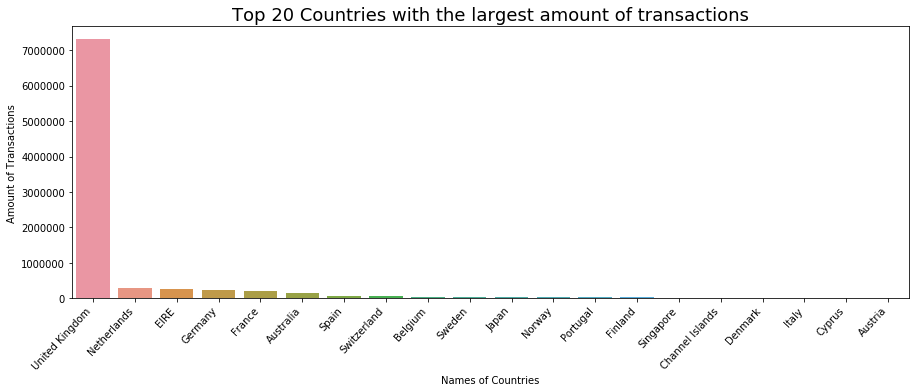

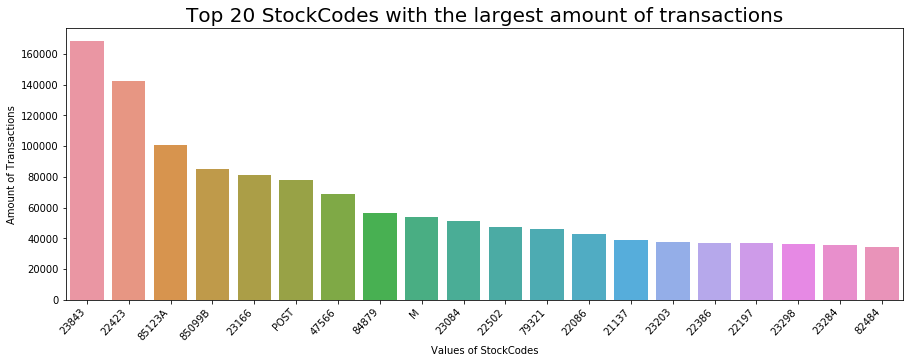

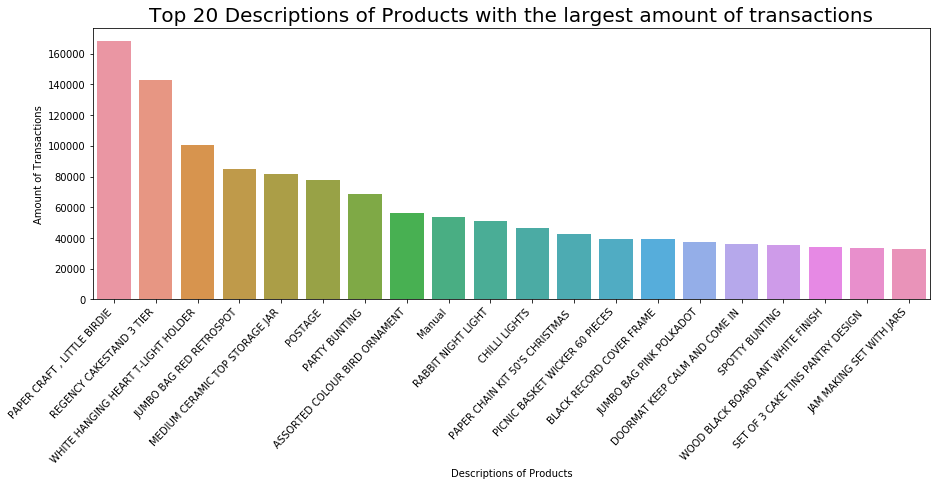

In [243]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax=sns.barplot(data=grouped_country.head(20), x=grouped_country.head(20).reset_index()['Country'], y=grouped_country.head(20).reset_index()['moneyspent'],estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.title('Top 20 Countries with the largest amount of transactions', fontsize = 18)
plt.xlabel('Names of Countries')
plt.ylabel('Amount of Transactions')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
grouped_stockcode=df.groupby(df['StockCode']).agg('sum').sort_values(by=['moneyspent'],ascending = False)
ax=sns.barplot(data=grouped_stockcode.head(20), x=grouped_stockcode.head(20).reset_index()['StockCode'], y=grouped_stockcode.head(20).reset_index()['moneyspent'],estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.title('Top 20 StockCodes with the largest amount of transactions', fontsize = 20)
plt.xlabel('Values of StockCodes')
plt.ylabel('Amount of Transactions')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
grouped_description=df.groupby(df['Description']).agg('sum').sort_values(by=['moneyspent'],ascending = False)
ax=sns.barplot(data=grouped_description.head(20), x=grouped_description.head(20).reset_index()['Description'], y=grouped_description.head(20).reset_index()['moneyspent'],estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.title('Top 20 Descriptions of Products with the largest amount of transactions', fontsize = 20)
plt.xlabel('Descriptions of Products')
plt.ylabel('Amount of Transactions')
plt.show()

Collection of the StockCode values for the largest "moneyspent" values

In [246]:
grouped_stockcode_UK=df.groupby(df[df['Country']=='United Kingdom']['StockCode']).agg('sum').sort_values(by=['moneyspent'],ascending = False).head(5)
grouped_stockcode_UK.head()

,Quantity,UnitPrice,CustomerID,moneyspent
StockCode,,,,
23843,80995,2.08,16446.0,168469.60
22423,9641,17849.95,21880398.0,110990.20
85123A,34705,5635.47,30432767.0,95013.95
23166,76919,216.01,2750499.0,80291.44
85099B,41981,2951.85,22727466.0,77371.57


In [245]:
grouped_stockcode_NL=df.groupby(df[df['Country']=='Netherlands']['StockCode']).agg('sum').sort_values(by=['moneyspent'],ascending = False).head(5)
grouped_stockcode_NL.head()

,Quantity,UnitPrice,CustomerID,moneyspent
StockCode,,,,
23084,4801,14.27,102522.0,9568.48
22326,3132,64.15,364306.0,7991.40
22629,4528,47.40,404427.0,7485.60
22630,4132,37.20,316594.0,6828.60
22328,1584,43.35,248982.0,4039.20


In [247]:
grouped_stockcode_EIRE=df.groupby(df[df['Country']=='EIRE']['StockCode']).agg('sum').sort_values(by=['moneyspent'],ascending = False).head(5)
grouped_stockcode_EIRE.head()

,Quantity,UnitPrice,CustomerID,moneyspent
StockCode,,,,
22423,645,785.40,943454.0,7388.55
C2,98,4875.00,1450568.0,4875.00
22838,331,119.15,128914.0,4235.65
M,2,3374.34,29822.0,3374.34
22960,756,123.25,455306.0,2976.00


Construction of the density functions of the UnitPrice values for the top 5 StockCode positions (from the amount of money spent point of view) and for the top 3 countries: UK, NL and EIRE

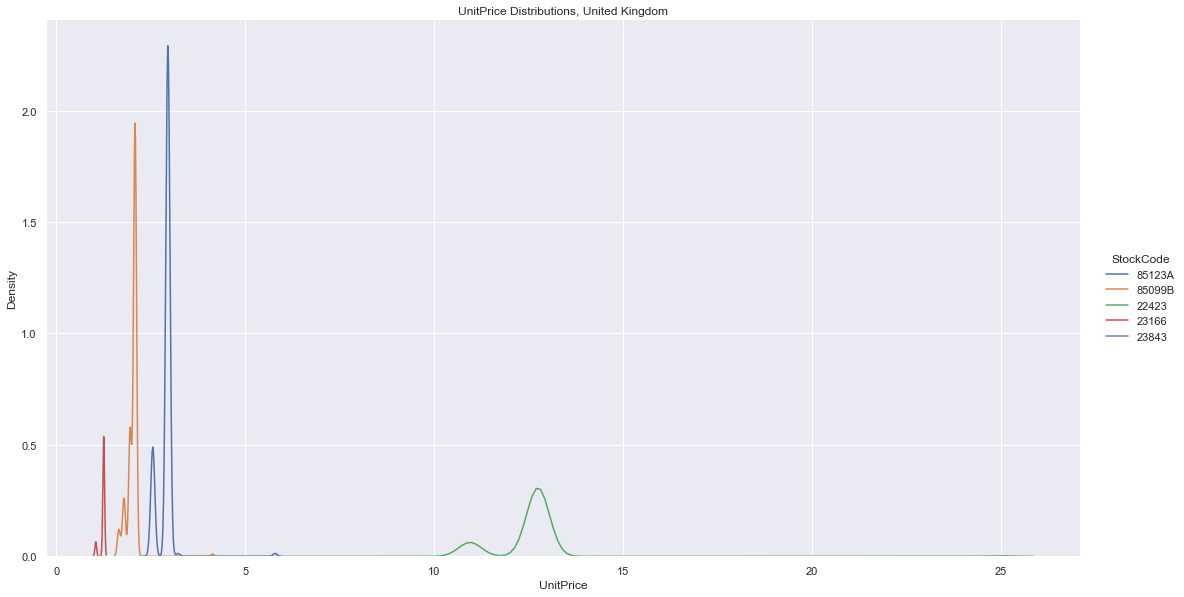

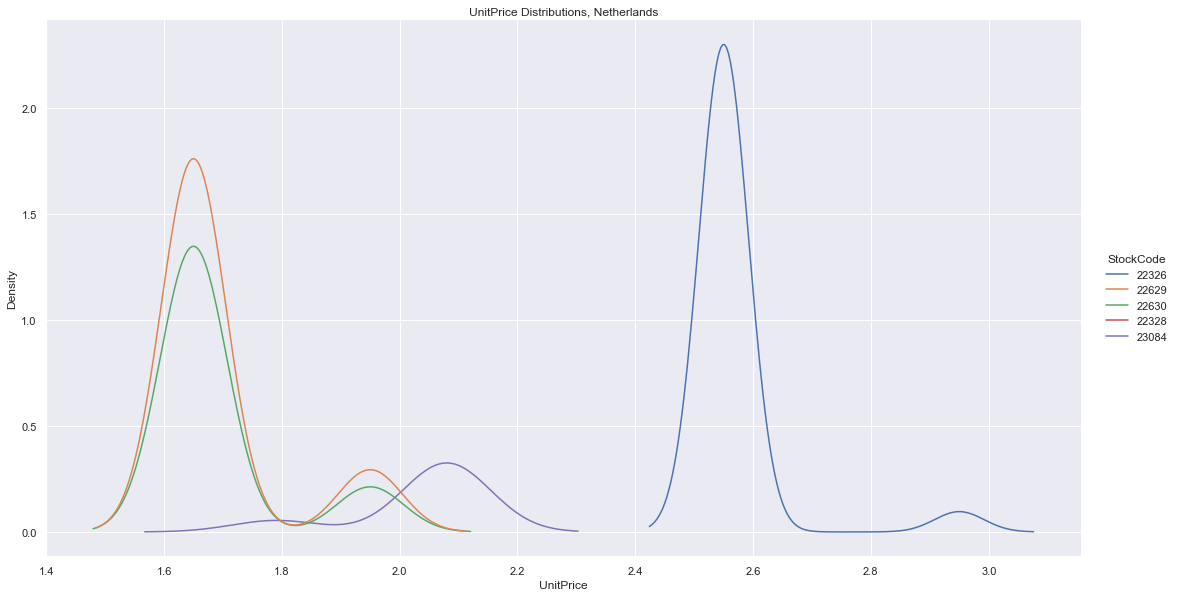

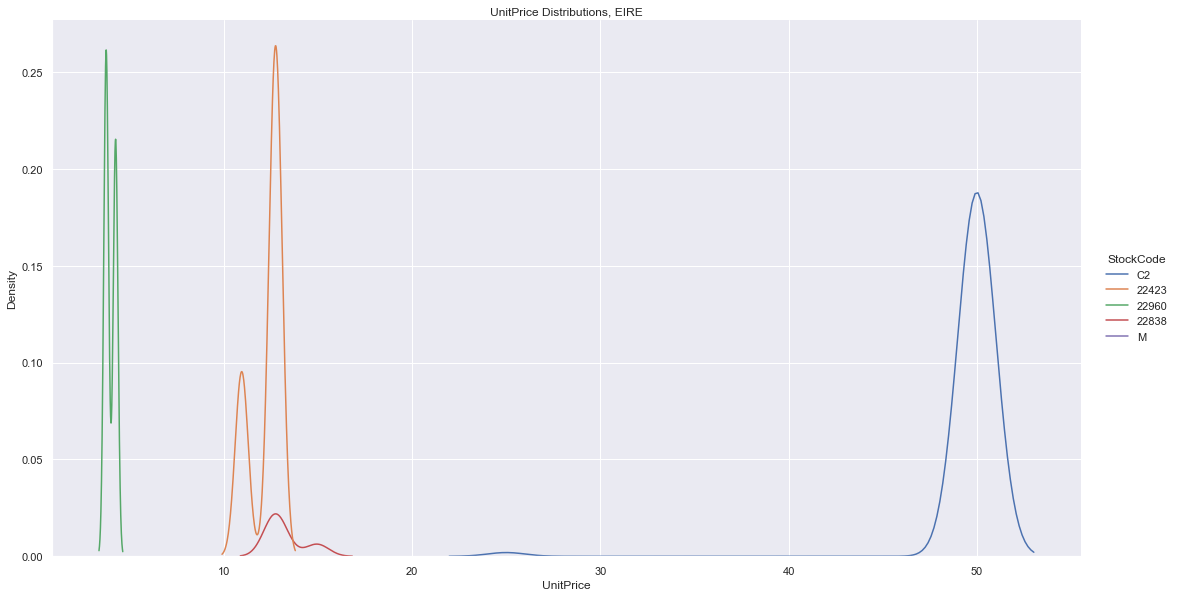

In [307]:
df['StockCode'] = df['StockCode'].astype(str)   
sns.set(rc={'figure.figsize':(41.7,18.1)})
df2=df[((df["Country"]=='United Kingdom') & (df["StockCode"]=="23843")) | ((df["Country"]=='United Kingdom') & (df["StockCode"]=="22423")) | ((df["Country"]=='United Kingdom') & (df["StockCode"]=="85123A"))| ((df["Country"]=='United Kingdom') & (df["StockCode"]=="23166")) | ((df["Country"]=='United Kingdom') & (df["StockCode"]=="85099B"))]
ax=sns.displot(data=df2, x="UnitPrice", kind='kde',hue='StockCode',height=8.27, aspect=11.7/6.27)
plt.title('UnitPrice Distributions, United Kingdom', fontsize = 12)

df2=df[((df["Country"]=='Netherlands') & (df["StockCode"]=="23084")) | ((df["Country"]=='Netherlands') & (df["StockCode"]=="22326")) | ((df["Country"]=='Netherlands') & (df["StockCode"]=="22629"))| ((df["Country"]=='Netherlands') & (df["StockCode"]=="22630")) | ((df["Country"]=='Netherlands') & (df["StockCode"]=="22328"))]
ax=sns.displot(data=df2, x="UnitPrice", kind='kde',hue='StockCode',height=8.27, aspect=11.7/6.27)
plt.title('UnitPrice Distributions, Netherlands', fontsize = 12)

df2=df[((df["Country"]=='EIRE') & (df["StockCode"]=="22423")) | ((df["Country"]=='EIRE') & (df["StockCode"]=="C2")) | ((df["Country"]=='EIRE') & (df["StockCode"]=="22838"))| ((df["Country"]=='EIRE') & (df["StockCode"]=="M")) | ((df["Country"]=='EIRE') & (df["StockCode"]=="22960"))]
ax=sns.displot(data=df2, x="UnitPrice", kind='kde',hue='StockCode',height=8.27, aspect=11.7/6.27)
plt.title('UnitPrice Distributions, EIRE', fontsize = 12)


# Charts were collected for each "StockCode-Country" correspondance. The whole set of the charts is in the ready-made docker. The number of the charts are (which correspond to the whole list of the possible "StockCode-country" combinations. Empty charts also were collected when there is not the corresponding values of "StockCode" for the considered country. The names of the charts are formed as: "Country, StockCode". Inside of each file there is a distribution line for each "StockCode-Country" combination) 
warnings.filterwarnings("ignore")
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

Also, it is possible to collect the whole collection of density functions for each "StockCode-Country" correspondance.

Charts were collected for each "StockCode-Country" correspondance. The whole set of the charts is in the zipped folder. Empty charts also were collected when there is not the corresponding values of "StockCode" for the considered country. The names of the charts are formed as: "Country, StockCode". Inside of each file there is a distribution line for each "StockCode-Country" combination) 


In [273]:
# Using jupyter notebook or another similar solution, give as a chart showing the  distribution of each product for each of the available countries (for this you can  answer by providing a view or a new collection, you can provide the chart with a  graphic outside the code). 

country=df['Country'].unique()
stockcode=df['StockCode'].unique()
for i in country:
    for j in stockcode:
        df2=df[df["Country"]==i]
        df3=df2[df2["StockCode"]==j]
        ax=sns.displot(data=df3, x="UnitPrice",  hue="Country", kind='kde')
        ax.set(title='Country: '+ str(i) +', StockCode: '+str(j))
        ax.savefig(r'C:/Users/.../images1/'+ str(i) +", " +str(j)+".png")
        ax.fig.clf()
        
# Charts were collected for each "StockCode-Country" correspondance. The whole set of the charts is in the zipped folder. The number of the charts are (which correspond to the whole list of the possible "StockCode-country" combinations. Empty charts also were collected when there is not the corresponding values of "StockCode" for the considered country. The names of the charts are formed as: "Country, StockCode". Inside of each file there is a distribution line for each "StockCode-Country" combination) 


# 8. Task 5
Using jupyter notebook or another similar solution, what is the average unit price? 

In [12]:
# Using jupyter notebook or another similar solution, what is the average unit price? 
print("The average unit price for the whole set: " + str(df["UnitPrice"].mean(axis = 0, skipna = True)))

The average unit price for the whole set: 4.611113626079312


# 9. Task 6
Using jupyter notebook or another similar solution, give us a chart showing the  distribution of prices.

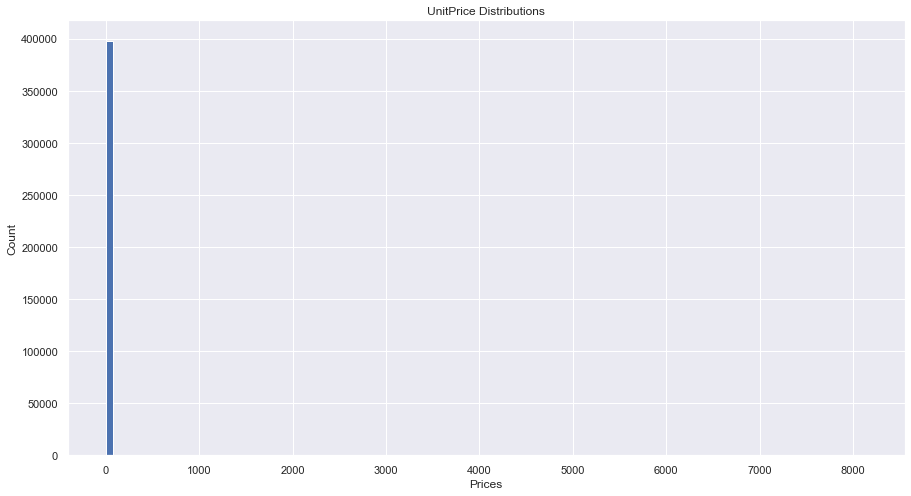

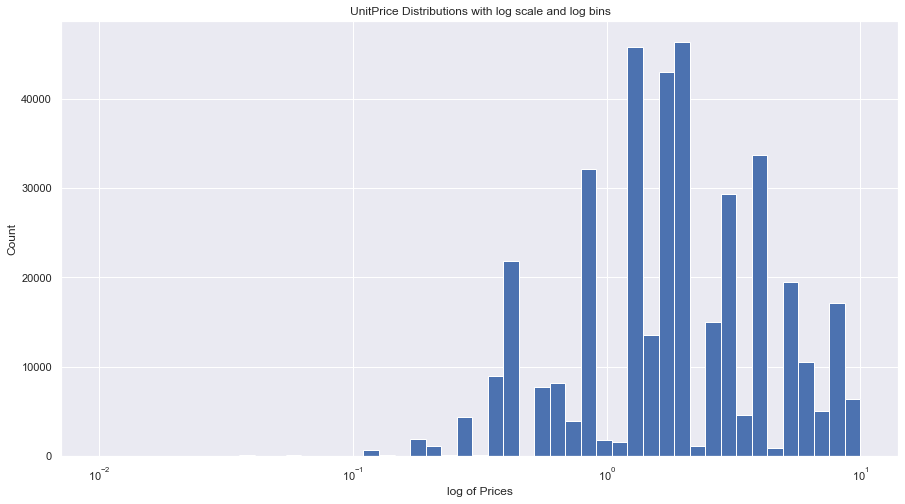

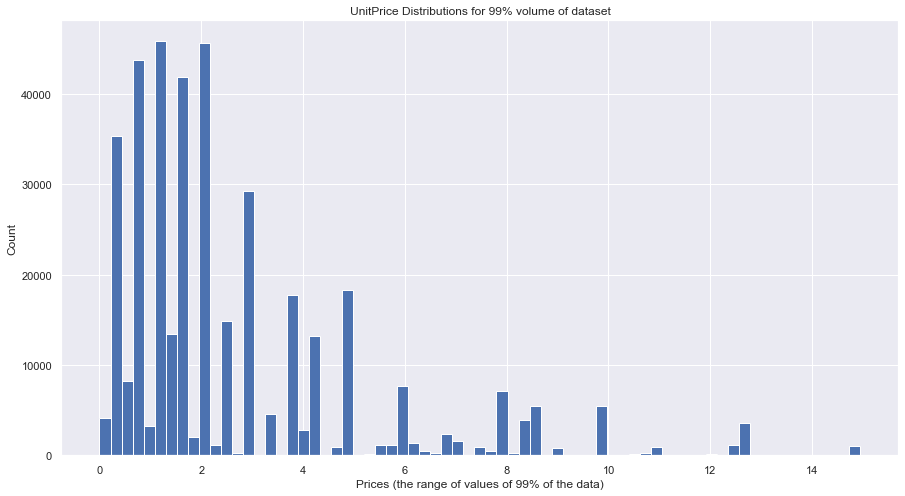

In [308]:
# Using jupyter notebook or another similar solution, give us a chart showing the  distribution of prices.
# Several possibilities are presented in order to show the distribution of prices (and different functions and tools are used):

# 1. The histogram itself of the whole set of prices is presented (which is detected to be a heavy long-tailed)
fig, ax = plt.subplots(1, 1, figsize = (15,8))
df['UnitPrice'].hist(bins=100, ax=ax)
plt.ylabel("Count")
plt.xlabel("Prices")
plt.title('UnitPrice Distributions')
plt.show()

# 2. The logarithmic bins histogram is constructed and logbins are used in order to cover right skewed shape
plt.figure(figsize = (15,8))
pl.hist(df['UnitPrice'], bins = 10 ** np.linspace(np.log10(.01), np.log10(10), 50))
pl.gca().set_xscale("log")
pl.ylabel("Count")
pl.xlabel("log of Prices")
plt.title('UnitPrice Distributions with log scale and log bins')
pl.show()

# 3. The histogram, which cover 99% of the data, is constructed using 99% percentile in order to solve the problem of heavy-tailed data
plt.figure(figsize = (15,8))
df["UnitPrice"].hist(bins=np.linspace(0,np.percentile(df["UnitPrice"], 99),70))
plt.ylabel("Count")
plt.xlabel("Prices (the range of values of 99% of the data)")
plt.title('UnitPrice Distributions for 99% volume of dataset')
plt.show()

# 10. Task 7
Using jupyter notebook or another similar solution, give us the ratio between price  and quantity for each invoice.

In [14]:
# Using jupyter notebook or another similar solution, give us the ratio between price  and quantity for each invoice.
grouped_invoiceNo_df=df.groupby(['InvoiceNo']).sum()
grouped_invoiceNo_df["ratio"] = grouped_invoiceNo_df["UnitPrice"] / grouped_invoiceNo_df["Quantity"]
grouped_invoiceNo_df.head()

,Quantity,UnitPrice,CustomerID,moneyspent,ratio
InvoiceNo,,,,,
536365,40,27.37,124950.0,139.12,0.684250
536366,12,3.70,35700.0,22.20,0.308333
536367,83,58.24,156564.0,278.73,0.701687
536368,15,19.10,52188.0,70.05,1.273333
536369,3,5.95,13047.0,17.85,1.983333


# 11. Task 8
Using jupyter notebook or another similar solution, map the different transactions to  countries, making visible the amount of transaction each country has.

In [369]:
# Using jupyter notebook or another similar solution, map the different transactions to  countries, making visible the amount of transaction each country has. 

# function to get the code of the country
def get_country_code(country_name):
     # pygal Two country code list notation: pygal.maps.world.COUNTRIES.items ()
    for code,name in pygal.maps.world.COUNTRIES.items():
        if name == country_name:
            return code
    return None

worldmap = pygal.maps.world.World()
wm_style = RotateStyle('#996699')
worldmap = World(style=wm_style)
worldmap.value_formatter = lambda x: "{:,}".format(x)
worldmap.force_uri_protocol = "http"
j=0
grouped_country_df=df.groupby(['Country']).sum()
transaction=grouped_country_df['moneyspent']
worldmap.title = 'Amount of Transactions to Country'
country_name=grouped_country_df.reset_index()['Country']
for i in country_name:
    code = get_country_code(i)
    worldmap.add(i, {code: transaction[j]})
    j=j+1
worldmap.render_in_browser()
# the world map chart is visible in browser

file://C:/Users/ELENA~1.SUD/AppData/Local/Temp/tmplyvxg4dh.html


# 12. Task 9
Using jupyter notebook or another similar solution, try to qualify the products in  order to create relevant groups based on their name and visualize them in order to  show which group made the most transactions.

,StockCode,count
3233,85123A,2035
1288,22423,1723
3219,85099B,1618
3059,84879,1408
2593,47566,1396
170,20725,1317
1570,22720,1159
172,20727,1105
3664,POST,1099
2033,23203,1098


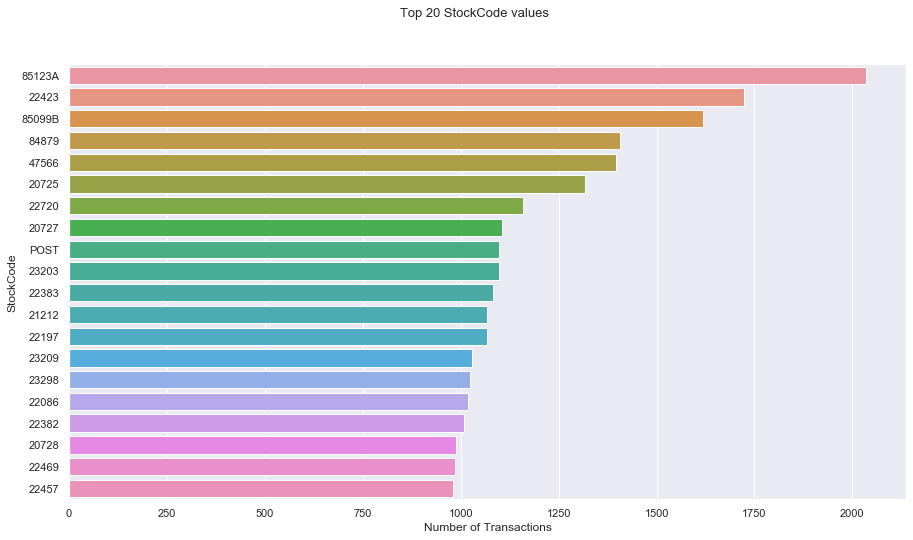

,Description,count
3698,WHITE HANGING HEART T-LIGHT HOLDER,2028
2767,REGENCY CAKESTAND 3 TIER,1723
1762,JUMBO BAG RED RETROSPOT,1618
216,ASSORTED COLOUR BIRD ORNAMENT,1408
2345,PARTY BUNTING,1396
1943,LUNCH BAG RED RETROSPOT,1316
3001,SET OF 3 CAKE TINS PANTRY DESIGN,1159
1935,LUNCH BAG BLACK SKULL.,1105
2611,POSTAGE,1099
2269,PACK OF 72 RETROSPOT CAKE CASES,1068


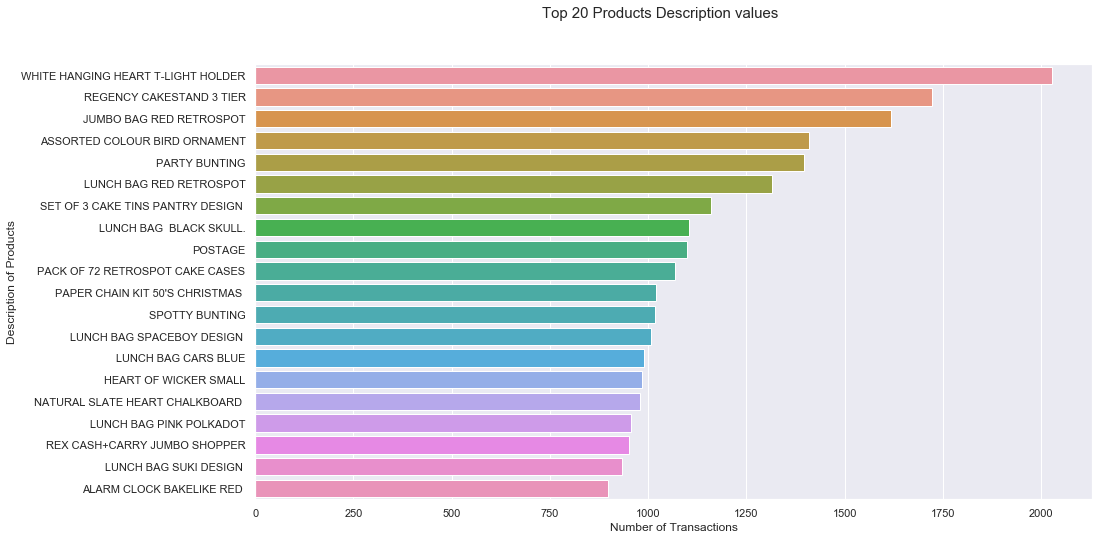

In [356]:
# Using jupyter notebook or another similar solution, try to qualify the products in  order to create relevant groups based on their name and visualize them in order to  show which group made the most transactions.

# In order to solve the task the data was grouped by "StockCode" values, using "size" or "count" sub function. And then, data was sorted and the pie chart for the 10 groups with the biggest number of transactions was constructed.

grouped_StockCode_df=df.groupby(['StockCode']).size().to_frame(name = 'count').reset_index()
grouped_StockCode_df.sort_values(by=['count'],inplace=True,ascending=False)
grouped_StockCode_df_top20=grouped_StockCode_df[0:20]
display(grouped_StockCode_df_top20.head(20))

labels=grouped_StockCode_df_top20['StockCode']
sizes=grouped_StockCode_df_top20['count']

plt.figure(figsize = (15,8))
plt.subplots_adjust(wspace=0.2)
sns.despine(left=True, bottom=True)
sns.barplot(x=sizes, y=labels ,orient='h').set(xlabel='Number of Transactions',ylabel='StockCode')
plt.suptitle('Top 20 StockCode values', fontsize=13)
plt.show()



grouped_StockCode_df=df.groupby(['Description']).size().to_frame(name = 'count').reset_index()
grouped_StockCode_df.sort_values(by=['count'],inplace=True,ascending=False)
grouped_StockCode_df_top20=grouped_StockCode_df[0:20]

display(grouped_StockCode_df_top20.head(20))
labels=grouped_StockCode_df_top20['Description']
sizes=grouped_StockCode_df_top20['count']

plt.figure(figsize = (15,8))
plt.subplots_adjust(wspace=0.2)
sns.despine(left=True, bottom=True)
sns.barplot(x=sizes, y=labels ,orient='h').set(xlabel='Number of Transactions',ylabel='Description of Products')
plt.suptitle('Top 20 Products Description values', fontsize=15)
plt.show()

# 13. Code (template) to import dataset inside a MongoDB

As the initial data is unknown, this part of the code should be filled for importing and considered as a template 

In [ ]:
# create a python program that is able to import this dataset  inside a MongoDB
# Connect to MongoDB
client =  MongoClient("mongodb+srv://<<YOUR USERNAME>>:<<PASSWORD>>@clustertest-icsum.mongodb.net/test?retryWrites=true&w=majority")
db = client['<<INSERT NAME OF DATABASE>>']
collection = db['<<INSERT NAME OF COLLECTION>>']
df.reset_index(inplace=True)
data_dict = df.to_dict("records")
# Insert collection
collection.insert_many(data_dict)